# Reflectivity

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

# iron layer
# no isotope defined, only electronic calculations
material_Fe = nx.Material(id = "iron",
                          composition = [["Fe", 1]],
                          density = 7.874)

layer_Fe = nx.Layer(id = "Fe",
                    material = material_Fe,
                    thickness = 10,
                    roughness = 0.4)

# silicon substrate#
substrate_Si = nx.Layer(id = "Si substrate",
                        material = nx.Material.Template(nx.lib.material.Si),
                        thickness = nx.inf,  # set the substrate to infinite thickness
                        roughness = 0.3)

# define sample
# in grazing incidence the beam profile and the sample length gets important
sample = nx.Sample(layers = [layer_Fe, substrate_Si], # define layers from top to bottom
                   geometry = "r",  # set the sample geometry to reflectivity
                   length = 10)# in mm

In [2]:
# standard initialization of a beam is linear sigma polarization 
# the polarization properties are not accounted for in electronic calculations
# in grazing incidence the beam profile and the size of the beam are important
beam  = nx.Beam(profile = 'g',   # Gaussian beam profile
                fwhm = 0.2)  # FWHM of the beam in the scattering plane, in mm
    
exp = nx.Experiment(beam = beam,
                    objects = [sample])

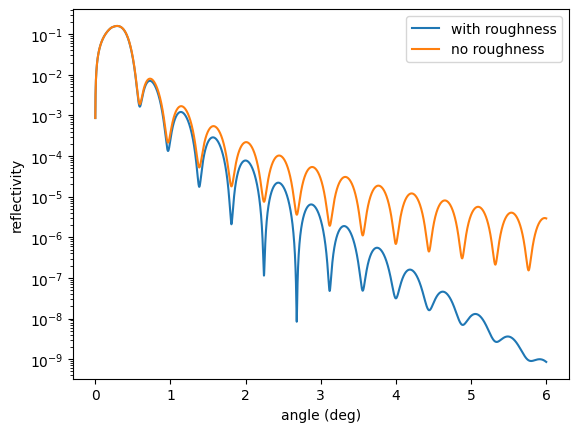

In [3]:
# reflectivity measurement

# define the angles for the calculations
angles = np.arange(0.001, 6, 0.001)

# create reflectivity object
# because in every expermient there can be a lot of objects you have to specify the sample for which the angles are changed
# this is done by the sample keyword
reflectivity = nx.Reflectivity(experiment = exp,
                               sample = sample,  # object for the reflectivity calculation
                               energy = nx.lib.energy.CuKalpha,  # Cu K alpha line
                               angles = angles)
  
plt.semilogy(angles, reflectivity(), label = 'with roughness')

# calculate again without taking roughness into account

sample.roughness = "n"
 

plt.semilogy(angles, reflectivity(), label = 'no roughness')
plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

False


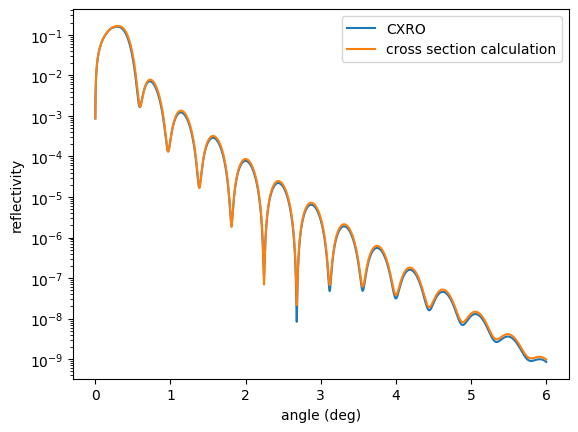

In [4]:
sample.roughness = "a"

plt.semilogy(angles, reflectivity(), label = 'CXRO')

nx.SetAtomicScatteringFactorCXRO(False)

print(nx.GetAtomicScatteringFactorCXRO())

plt.semilogy(angles, reflectivity(), label = 'cross section calculation')

plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()